![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [3]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    assert f(a)*f(b) < 0
    pts = [a,b]
    
    if np.abs(f(a)) < ytol or np.abs(f(b)) < ytol:        
        return pts
    
    p1 = a
    p2 = b
    p = (p1+p2)/2
    diff = np.abs(p1-p2)
    while diff >= xtol and np.abs(f(p)) >= ytol:
        pts.append(p)
        if f(p)*f(a) > 0:
            p1 = p
        else:
            p2 = p
        p = (p1+p2)/2
        diff = np.abs(p1-p2)
        
    # pts.append(p)
    return pts

In [4]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    res = [x]
    while len(res) <= maxiter:
        nx = res[-1] - f(res[-1])/df(res[-1])
        res.append(nx)
        if np.abs(f(nx)) < ytol or np.abs(res[-1] - res[-2]) < xtol:
            return res
    return res

## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [5]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return ( f(x+h) - f(x-h) )/(2*h)

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    df = lambda xx: df_central(f, xx, h)
    return df_central(df, x, h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

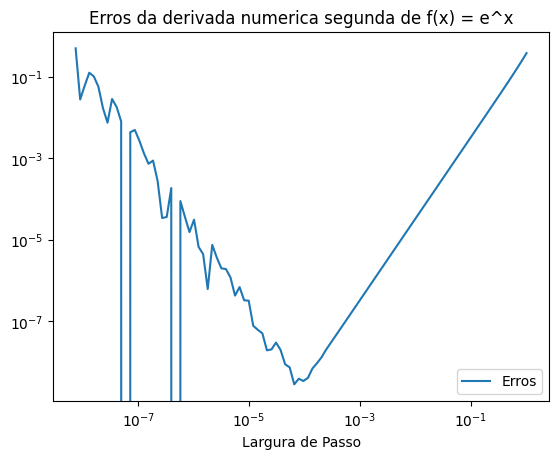

In [6]:
hs = np.logspace(-27,0,base=2, num=100)
erros = np.abs(np.exp(0) - ddf_central(np.exp, 0, hs))
plt.title("Erros da derivada numerica segunda de f(x) = e^x")
plt.xlabel("Largura de Passo")
plt.loglog(hs, erros, label="Erros")
plt.legend()
ax = plt.gca()

In [7]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

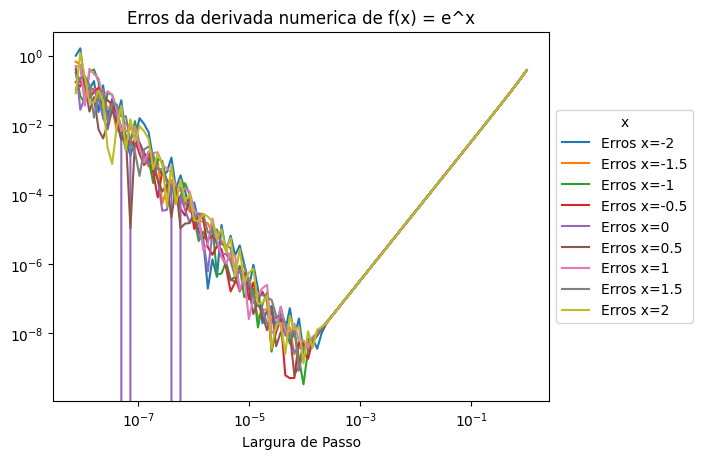

In [8]:
hs = np.logspace(-27,0,base=2, num=100)
erros_n2 = np.abs(np.exp(-2) - ddf_central(np.exp, -2, hs))/np.exp(-2)
erros_n15 = np.abs(np.exp(-1.5) - ddf_central(np.exp, -1.5, hs))/np.exp(-1.5)
erros_n1 = np.abs(np.exp(-1) - ddf_central(np.exp, -1, hs))/np.exp(-1)
erros_n05 = np.abs(np.exp(-0.5) - ddf_central(np.exp, -0.5, hs))/np.exp(-0.5)
erros_0 = np.abs(np.exp(0) - ddf_central(np.exp, 0, hs))/np.exp(0)
erros_p05 = np.abs(np.exp(0.5) - ddf_central(np.exp, 0.5, hs))/np.exp(0.5)
erros_p1 = np.abs(np.exp(1) - ddf_central(np.exp, 1, hs))/np.exp(1)
erros_p15 = np.abs(np.exp(1.5) - ddf_central(np.exp, 1.5, hs))/np.exp(1.5)
erros_p2 = np.abs(np.exp(2) - ddf_central(np.exp, 2, hs))/np.exp(2)
plt.title("Erros da derivada numerica de f(x) = e^x")
plt.xlabel("Largura de Passo")
plt.loglog(hs, erros_n2, label="Erros x=-2")
plt.loglog(hs, erros_n15, label="Erros x=-1.5")
plt.loglog(hs, erros_n1, label="Erros x=-1")
plt.loglog(hs, erros_n05, label="Erros x=-0.5")
plt.loglog(hs, erros_0, label="Erros x=0")
plt.loglog(hs, erros_p05, label="Erros x=0.5")
plt.loglog(hs, erros_p1, label="Erros x=1")
plt.loglog(hs, erros_p15, label="Erros x=1.5")
plt.loglog(hs, erros_p2, label="Erros x=2")
plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

In [9]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Comente.

É possível ver pelo gráfico acima que quando a largura de passo é muito pequena (abaixo de $10^{-5}$), o erro vai aumentando. Isso me parece ocorrer porque começa a se ter erro de precisão para o cálculo da inclinação da curva, mas, quando o passo chega por volta de $10^{-4}$, há o erro mínimo para praticamente todos os casos.

É engraçado, também, ver que, a partir de $10^{-4}$, o erro parece crescer, novamente, de forma exponencial, agora por conta de o passo ser muito grande perante a variação representada pela derivada - ou seja, a secante que a derivada numérica representa, deixa de representar adequadamente a derivada.

Verifica-se também, que, independentemente do valor de x, o erro relativo é sempre o mesmo.

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [10]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [11]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, 1e-3)

def g3(x):
    return df_central(f, x, 1e-5)

In [12]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

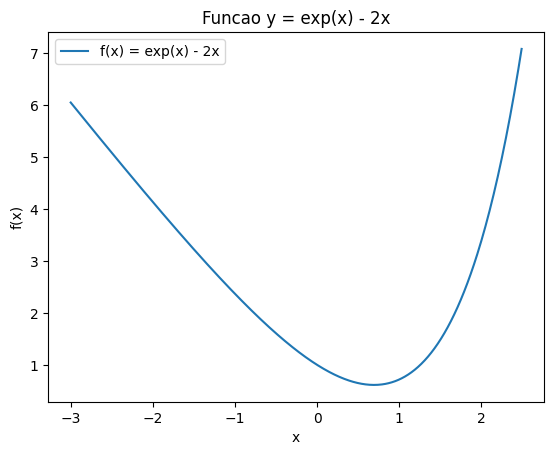

In [13]:
xx = np.arange(-3, 2.5, 0.01)
yy = f(xx)

plt.title("Funcao y = exp(x) - 2x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xx, yy, label="f(x) = exp(x) - 2x")
plt.legend()
ax = plt.gca()

In [14]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

Eu escolheria, claramente, o intervalo **[-0.5, 1.5]**, porque o mínimo da função está claramente dentro desse intervalo, e o mínimo de uma função é sempre identificado por um ponto em que a derivada é zero - assim, nesse intervalo é possível determinar o zero da derivada.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

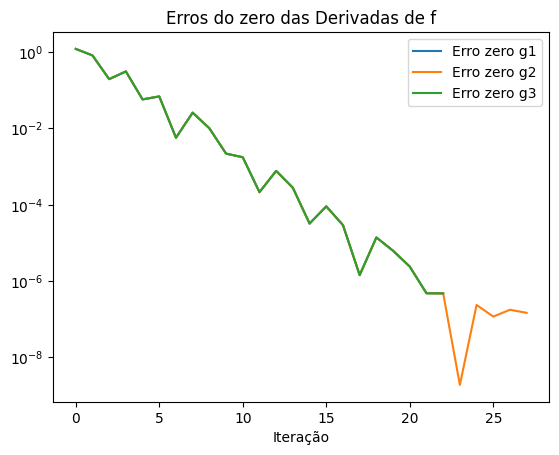

In [15]:
bissec_erro_g1 = np.abs(bissecao_pts(g1, -0.5, 1.5) - np.log(2))
bissec_erro_g2 = np.abs(bissecao_pts(g2, -0.5, 1.5) - np.log(2))
bissec_erro_g3 = np.abs(bissecao_pts(g3, -0.5, 1.5) - np.log(2))

plt.title("Erros do zero das Derivadas de f")
plt.xlabel("Iteração")
plt.yscale("log")
plt.plot(bissec_erro_g1, label="Erro zero g1")
plt.plot(bissec_erro_g2, label="Erro zero g2")
plt.plot(bissec_erro_g3, label="Erro zero g3")
plt.legend()

ax = plt.gca()

In [16]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

A bisseção funcionou extremamente bem para encontrar o zero da função derivada, seja a função derivada calculada numericamente ou analiticamente. Estranhamente, independentemente do passo da aproximação numérica, o resultado da bisseção foi a mesma, mostrando que os dois passos tiveram a mesma capacidade de aproximar a derivada.

Entretanto, o número de iterações da bisseção para se encontrar o zero da derivada numérica que possui o passo maior foi maior do que o da bisseção sobre a derivada numérica com o passo menor, mostrando que há algum tipo de melhoria de precisão quando se diminuiu o passo de $10^{-3}$ para $10^{-5}$.


## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [17]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(f, x, 1e-5)

In [18]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

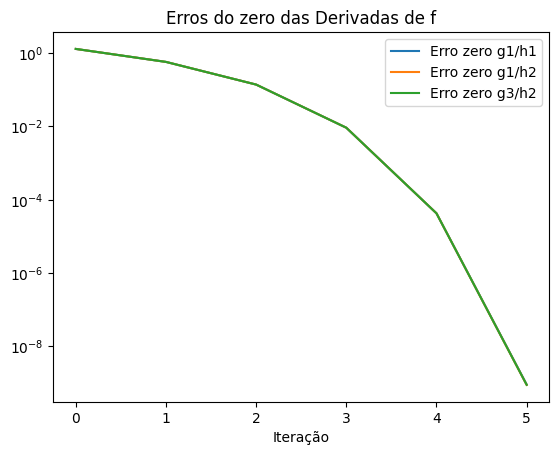

In [19]:
erros_analitic = np.abs(newton_pts(g1, h1, 2) - np.log(2))
erros_analitic_numeric = np.abs(newton_pts(g1, h2, 2) - np.log(2))
erros_numeric_numeric = np.abs(newton_pts(g3, h2, 2) - np.log(2))

plt.title("Erros do zero das Derivadas de f")
plt.xlabel("Iteração")
plt.yscale("log")
plt.plot(erros_analitic, label="Erro zero g1/h1")
plt.plot(erros_analitic_numeric, label="Erro zero g1/h2")
plt.plot(erros_numeric_numeric, label="Erro zero g3/h2")
plt.legend()

ax = plt.gca()

In [20]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

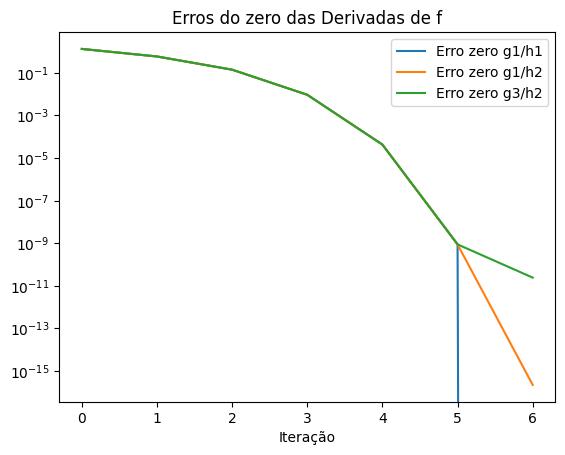

In [21]:
erros_analitic = np.abs(newton_pts(g1, h1, 2, xtol=1e-15, ytol=1e-15) - np.log(2))
erros_analitic_numeric = np.abs(newton_pts(g1, h2, 2, xtol=1e-15, ytol=1e-15) - np.log(2))
erros_numeric_numeric = np.abs(newton_pts(g3, h2, 2, xtol=1e-15, ytol=1e-15) - np.log(2))

plt.title("Erros do zero das Derivadas de f")
plt.xlabel("Iteração")
plt.yscale("log")
plt.plot(erros_analitic, label="Erro zero g1/h1")
plt.plot(erros_analitic_numeric, label="Erro zero g1/h2")
plt.plot(erros_numeric_numeric, label="Erro zero g3/h2")
plt.legend()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

A primeira diferença que pude ver foi o fato de a versão analítica da função ter atingido o valor praticamente exato do zero, com erro igual a zero (ou seja, menor que a precisão do computador).

A segunda diferença é que na última iteração, a aproximação feita apenas com as derivadas numéricas diverge em relação à aproximação feita com a primeira derivada analítica e a segunda numérica. Diferenças de precisão começam a aparecer. 

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

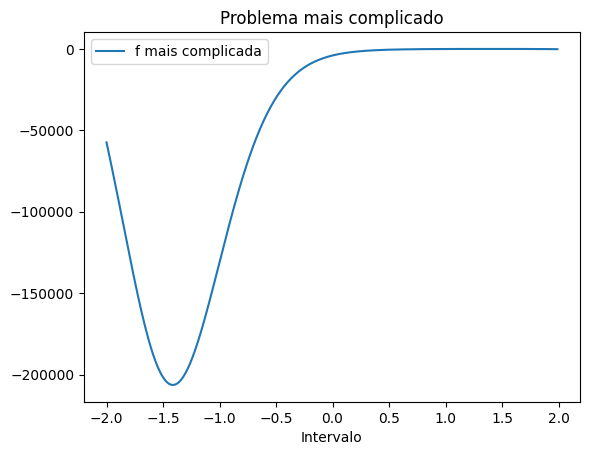

In [22]:
def f(x):
    return np.exp(np.power(x,2) - 2*x + 1) - np.power(2,np.power(x,3) - 6*x + 12)

xx = np.arange(-2, 2, 0.01)
yy = f(xx)

plt.title("Problema mais complicado")
plt.xlabel("Intervalo")
plt.plot(xx, yy, label="f mais complicada")
plt.legend()

ax = plt.gca()

In [23]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [24]:
def g1(x):
    return (2*x-2)*np.exp(np.power(x,2)-2*x+1)-np.log(2)*(3*np.power(x,2)-6)*np.power(2,np.power(x,3)-6*x+12)

In [25]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [26]:
aproximacoes = np.array(bissecao_pts(g1, -2, -1))
print("Raiz exata calculada: {}".format(aproximacoes[-1]))

Raiz exata calculada: -1.4128723964095116


Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [28]:
valores = f(aproximacoes)
minx = None
minval = np.inf
minIndex = -len(valores)
for i in range(len(valores)):
    val = valores[i]
    if val < minval:
        minx = aproximacoes[i]
        minval = val
        minIndex = i - len(valores)
print("Menor x: {}, menor f(x): {}, menor indice: {}".format(minx, minval, minIndex))

Menor x: -1.4128724038600922, menor f(x): -206314.77303578667, menor indice: -3


Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [30]:
print("Distancia em valor de x: {} ".format(np.abs(minx - aproximacoes[-1])))
print("Distancia em valor de y: {} ".format(np.abs(f(minx) - f(aproximacoes[-1]))))
print("Distancia em posição no array de aproximações: {} elementos".format(np.abs(minIndex)-1))

Distancia em valor de x: 7.450580596923828e-09 
Distancia em valor de y: 2.6193447411060333e-10 
Distancia em posição no array de aproximações: 2 elementos


O que você acha que aconteceu?

O ponto minimo identificado pelo processo de bisseção não convergiu para o mínimo calculado entre os próprios valores identificados pelo método de bisseção. Claramente o mínimo identificado entre os pontos da bisseção não é o ponto de convergência para o zero, desse método. 

Os valores de f(x) no método de bisseção não convergiram em Y, apesar de terem chegado ao valor mínimo para o tamanho do intervalo. Entretanto a margem de erro em Y para o valor mínimo e último valor encontrado ficou na ordem de $10^{10}$, mostrando que se trata de um erro de precisão.

A função f assume valores muito grandes (em módulo), ultrapassando o mínimo da precisão em x, sem atingir a precisão adequada em y, impedindo uma identificação assertiva do verdadeiro ponto de mínimo.

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

Raiz exata calculada- x:-1.4128724019266927, f(x):-206314.77303578623


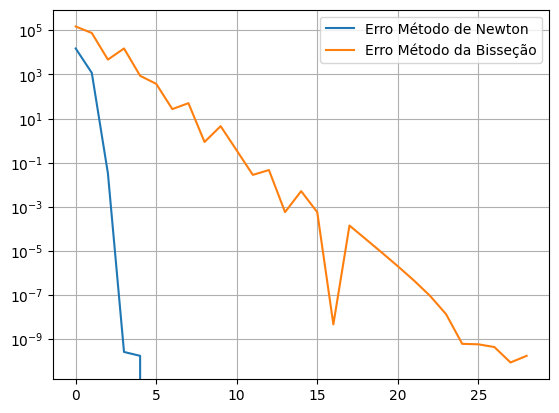

In [31]:
def df(x):
    return df_central(f, x, 1e-4)

def ddf(x):
    return ddf_central(f, x, 1e-4)

aproximacoes_newton = newton_pts(df, ddf, -1.25)
print("Raiz exata calculada- x:{}, f(x):{}".format(aproximacoes_newton[-1], f(aproximacoes_newton[-1])))

valor_exato_estimado = f(np.array(aproximacoes_newton[-1]))
erro_newton = np.abs(f(np.array(aproximacoes_newton)) - valor_exato_estimado)
erro_bissecao = np.abs(f(np.array(aproximacoes)) - valor_exato_estimado)

plt.yscale("log")
plt.plot(erro_newton, label="Erro Método de Newton")
plt.plot(erro_bissecao, label="Erro Método da Bisseção")
plt.legend()
plt.grid()
ax = plt.gca()

In [32]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [33]:
for l in ax.lines:
    ys = l.get_ydata()
    assert min(abs(ys)) < 1e-8